# Introduction


This case study is the Capstone Project of Google Data Analytics Professional Certificate .In this Case Study I'm working as a Junior data analyst working for a Fictional Business Intelligence consultant and I have been at this job for six months, and my boss feels you are ready for more responsibility.I have been asked to lead a project for a brand new client Guissepe Carlos who is The Proprietor of a Carlos Pizza a fiticious Pizza Parlor. I've been given the task of presenting data-driven recommendations/answers based on the question asked by the Proprietor of the Pizza Parlour for the improvement of sales for the business.

In order to answer the key business questions, I followed the steps of the data analysis process: ask, prepare, process, analyze, share, and act.

# 1. Ask


   * 1. **How many customers do we have each day? Are there peak hours?**       
   * 2. **How many pizzas are typically in an order? Do we have any best sellers?**
   * 3. **How much money did we make this year? Can we identify any seasonality in the change?**
   * 4. **Are there any pizzas we should take off the menu? Or Promotion we could leverage?**
   
   
   
   
   #### Key Stakeholders:
   * 1. **Aaron Aaron (my boss)**
   * 2. **Guissepe Carlos (Pizza Parlor Proprietor)**
   
   NOTE: Names are Completely Fictional

# 2. Prepare


* The Data being used for this analysis was gotten from the Maven analytics Data playground.
* There are 4 differnt tables available on the dataset Orders, Orders_details, Pizza, Pizza_types table will be used for analysis.
* It is a structured and well organised Data.
* It is a Year worth sales from the fiticious Pizza Parlour
* The Data has been made available by Vicent-Arel Bundock(R-Datasets) , License:Public Domain
* The Data is accurate and Consistent
*  The Data is Reliable, Original, Comprehensive, Current and Cited (as in ROCCC)

# 3. Process


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.api.types import CategoricalDtype

# import neccessary python modules

In [2]:
order = pd.read_csv('C:\\Users\\ODOSA\\Downloads\\orders.csv')
order_details = pd.read_csv('C:\\Users\\ODOSA\\Downloads\\order_details.csv')
pizza = pd.read_csv('C:\\Users\\ODOSA\\Downloads\\pizzas.csv')
pizza_type = pd.read_csv('C:\\Users\\ODOSA\\Downloads\\pizza_types.csv', encoding='latin-1')

# importing 4 .csv files

> # 3.1 Joins


In [3]:
orders = order.merge(order_details, on='order_id')

# joining the order and order_details tables with the 'order_id' column

orders.head()

# calling the first 5 rows of the orders table

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1


In [4]:
pizzas = pizza.merge(pizza_type, on='pizza_type_id')

# joining the pizza and pizza_type table with the 'pizza_type_id' column

pizzas.head()

# calling the first 5 rows of thr izzas table

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [5]:
data = orders.merge(pizzas, on='pizza_id')

# joining the pizzas and orders table into one dataframe with the "pizza_id" column

data.head()

# calling the first 5 rows of the dataframe

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


> # 3.2 Cleaning Process


In [6]:
data.isna().sum()

# checking th sum of missing values across all columns in the dataframe "data"

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [7]:
data = data.sort_values(by = 'order_id')

# sorting values by "order_id" column in Ascending order

data.head()

# calling the first 5 rows of the Dataframe

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4178,2,2015-01-01,11:57:40,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
3726,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
2991,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
1632,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."


In [8]:
data.shape

# number of rows and columns

(48620, 12)

In [9]:
data.duplicated().value_counts()

# checking the number of duplicated rows

False    48620
dtype: int64

In [10]:
data.info()

# datatypes and null count for the dataframe "data"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 7364
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [11]:
data['date_time'] = data[['date', 'time']].apply(" ".join, axis=1)

#merging the date and time columns into a column, date_time.

data.head()
# calling the first 5 rows of the dataframe

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date_time
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
4178,2,2015-01-01,11:57:40,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2015-01-01 11:57:40
3726,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40
2991,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40
1632,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40


In [12]:
data['date_time'] = data['date_time'].astype('datetime64')

# Coverting datatype of "date_time" column to "datetime64" type.

data.head()
# calling the first 5 rows of the dataframe

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date_time
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
4178,2,2015-01-01,11:57:40,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2015-01-01 11:57:40
3726,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40
2991,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40
1632,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40


In [13]:
data['date'] = data['date'].astype('datetime64')

# Coverting datatype of "date" column to "datetime64" type.

data.head()
# calling the first 5 rows of the dataframe

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date_time
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
4178,2,2015-01-01,11:57:40,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2015-01-01 11:57:40
3726,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40
2991,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40
1632,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40


In [14]:
data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date_time
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36
4178,2,2015-01-01,11:57:40,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2015-01-01 11:57:40
3726,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40
2991,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40
1632,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40


In [15]:
cats1 = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['month'] = data['date_time'].dt.month_name()
data['month'] = data['month'].astype(CategoricalDtype(categories=cats1, ordered=False))

cats2 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
data['day_of_week'] = data['date'].dt.day_name()
data['day_of_week'] = data['day_of_week'].astype(CategoricalDtype(categories=cats2, ordered=False))


# Creating new columns "month", "day_of_week" and Converting datatypes.

data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date_time,month,day_of_week
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,January,Thursday
4178,2,2015-01-01,11:57:40,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2015-01-01 11:57:40,January,Thursday
3726,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40,January,Thursday
2991,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40,January,Thursday
1632,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40,January,Thursday


In [16]:
data['hour'] = data['date_time'].dt.hour
data = data.astype({'hour':'int8'})

# creating new column "hour" and converting datatypes
# NB: hour is between 9 to 23 which is from 9am to 11pm
data.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date_time,month,day_of_week,hour
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01 11:38:36,January,Thursday,11
4178,2,2015-01-01,11:57:40,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",2015-01-01 11:57:40,January,Thursday,11
3726,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01 11:57:40,January,Thursday,11
2991,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01 11:57:40,January,Thursday,11
1632,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01 11:57:40,January,Thursday,11


In [17]:
data = data.drop(columns=['date_time', 'time'])

# dropping/deleting any column/columns irrelevant to our analysis
data.head()

,order_id,date,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,month,day_of_week,hour
0,1,2015-01-01,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",January,Thursday,11
4178,2,2015-01-01,6,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",January,Thursday,11
3726,2,2015-01-01,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",January,Thursday,11
2991,2,2015-01-01,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",January,Thursday,11
1632,2,2015-01-01,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",January,Thursday,11


# 4. Analyze

> # 4.1 

> #  How many customers do we have each day? Are there peak hours?  


In [18]:
data.pivot_table(values="order_id", index="date", fill_value=0,aggfunc=["count"])

# A pivot table is created to show the total number of customers that patronize the pizza parlour each day.
# It's worthy to note that the order_id column documents a particular order made at a point in time which might contain 1 or more pizza, the order_details_id column on the other hand documents the id of just one pizza irrespective of the total number of pizza in an order.

,count
,order_id
date,
2015-01-01,161
2015-01-02,160
2015-01-03,154
2015-01-04,106
2015-01-05,121
...,...
2015-12-27,87
2015-12-28,102


In [19]:
data[data["date"] == "2015-12-31 "]

# This displays the total numbers of cutomers that patronized the pizza parlour when the date is changed to a desired date to query

,order_id,date,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,month,day_of_week,hour
45184,21278,2015-12-31,48451,ital_cpcllo_s,1,ital_cpcllo,S,12.00,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",December,Thursday,11
8842,21278,2015-12-31,48450,classic_dlx_s,1,classic_dlx,S,12.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",December,Thursday,11
30114,21278,2015-12-31,48452,veggie_veg_l,1,veggie_veg,L,20.25,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",December,Thursday,11
33846,21279,2015-12-31,48453,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",December,Thursday,11
33847,21280,2015-12-31,48454,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",December,Thursday,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22493,21348,2015-12-31,48618,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",December,Thursday,21
22025,21348,2015-12-31,48617,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",December,Thursday,21
33849,21348,2015-12-31,48616,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",December,Thursday,21
13174,21349,2015-12-31,48619,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",December,Thursday,22


In [20]:
data.pivot_table(values="order_id", index="day_of_week",aggfunc=["count"])

# A pivot table created to show the total number of orders made on the days of the week across the year

,count
,order_id
day_of_week,
Sunday,5917
Monday,6369
Tuesday,6753
Wednesday,6797
Thursday,7323
Friday,8106
Saturday,7355


In [21]:
data['day_of_week'].value_counts(normalize=True)

# proportion of day_of_week across the year

Friday       0.166722
Saturday     0.151275
Thursday     0.150617
Wednesday    0.139798
Tuesday      0.138893
Monday       0.130995
Sunday       0.121699
Name: day_of_week, dtype: float64

In [22]:
data['month'].value_counts(normalize=True)

# proportion of months across the year

July         0.088462
May          0.087186
March        0.086096
November     0.086076
January      0.085479
August       0.084204
April        0.083649
June         0.082785
February     0.080049
December     0.079371
September    0.078548
October      0.078095
Name: month, dtype: float64

In [23]:
peak_hours = data['hour'].value_counts().sort_index()

# The hour values (from 9 to 23) are categorized to give the total number an order was made at that hour across the year

peak_hours

# This calls the peak_hours

9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
Name: hour, dtype: int64

<AxesSubplot:>

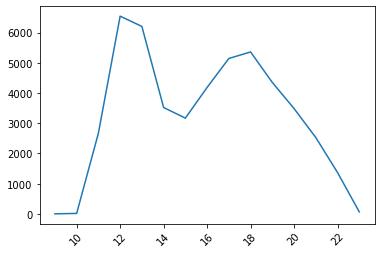

In [24]:
peak_hours.plot( kind="line", rot=45)

# This plot a line graph of the value_counts  the "hour" column

* Here it shows **peak hours** between **12pm and 1pm** and between **5pm and 6pm**
* There are generally more orders on **Friday's and Saturday's (weekends)**
* July being the **peak month and Friday being the peak day of week**

> # 4.2
> # How many pizzas are typically in an order? Do we have any best sellers?

In [25]:
quan_tity =data['quantity'].value_counts()

# Value_counts of the pizza quantity in an order

quan_tity.head()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

In [26]:
data['quantity'].value_counts(normalize=True)*100

# Proportion of Pizza Quantity

1    98.093377
2     1.857260
3     0.043192
4     0.006170
Name: quantity, dtype: float64

<AxesSubplot:>

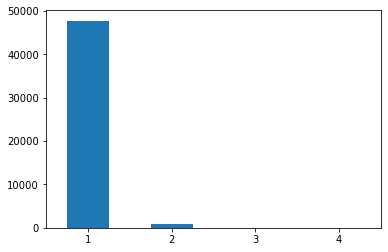

In [27]:
quan_tity.plot( kind="bar", rot=0)

In [28]:
cat = data['category'].value_counts()
cat.head()

# value count of differnt pizza category

Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: category, dtype: int64

In [29]:
data['category'].value_counts(normalize=True)*100

# proporition of different pizza category

Classic    29.985603
Supreme    24.222542
Veggie     23.547923
Chicken    22.243933
Name: category, dtype: float64

<AxesSubplot:>

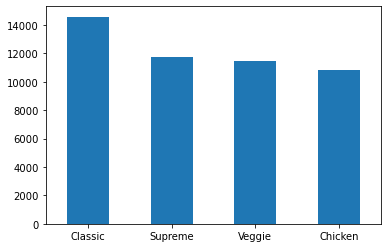

In [30]:
cat.plot( kind="bar", rot=0)

In [31]:
data['name'].value_counts()

# value counts of different pizza name

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

In [32]:
data['name'].value_counts(normalize=True)*100

# Proportion of different pizza name

The Classic Deluxe Pizza                      4.969148
The Barbecue Chicken Pizza                    4.878651
The Hawaiian Pizza                            4.874537
The Pepperoni Pizza                           4.872480
The Thai Chicken Pizza                        4.761415
The California Chicken Pizza                  4.734677
The Sicilian Pizza                            3.881119
The Spicy Italian Pizza                       3.881119
The Southwest Chicken Pizza                   3.877005
The Four Cheese Pizza                         3.805019
The Italian Supreme Pizza                     3.802962
The Big Meat Pizza                            3.724805
The Vegetables + Vegetables Pizza             3.105718
The Mexicana Pizza                            2.994652
The Napolitana Pizza                          2.984369
The Spinach and Feta Pizza                    2.945290
The Prosciutto and Arugula Pizza              2.937063
The Pepper Salami Pizza                       2.924722
The Italia

In [33]:
si_ze = data['size'].value_counts()
si_ze.head()

# Value counts of different pizza sizes

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: size, dtype: int64

In [34]:
data['size'].value_counts(normalize=True)*100

# proportion of different pizza sizes

L      38.103661
M      31.643357
S      29.076512
XL      1.118881
XXL     0.057589
Name: size, dtype: float64

<AxesSubplot:>

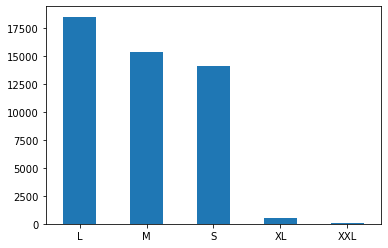

In [35]:
si_ze.plot( kind="bar", rot=0)

* There is typically **one** pizza in order
* The **Classic** category is the most ordered category
* The **Large** pizza is the most sought after pizza size
* Due to the large variety of pizza names there is not much difference between them.

> # 4.3
> # How much money did we make this year? Can we identify any seasonality in the change?

In [36]:
data["price"].value_counts()

# Value counts of pizza prices, on the right is the total number of times that price was paid for a pizza

20.75    8685
12.00    5600
16.00    4474
16.75    4294
16.50    4040
12.50    3328
20.25    3032
12.75    2507
20.50    1998
18.50    1359
17.95    1273
16.25    1114
10.50    1001
12.25     830
9.75      739
15.25     712
14.75     577
11.00     570
25.50     544
23.65     480
13.25     473
14.50     391
17.50     381
21.00     190
35.95      28
Name: price, dtype: int64

In [37]:
data['price'].sum()

# Total amount made from pizza sales in the year 2015

801944.7000000001

In [38]:
data.pivot_table(values="price", index="month",aggfunc=["sum"])

# A pivot table displaying the total amount of pizza sold on each month across the year

,sum
,price
month,
January,68472.70
February,64067.40
March,69198.00
April,67286.20
May,69939.35
June,66796.30
July,71027.45
August,67068.80


* A total of **801,944 (in dollar)** was made this year
* Total amount made per month was between **62,000 and 71,000 (in dollar)** with July being the highest earning month.

> # 4.4
> # Are there any pizzas we should take off the menu? Or Promotion we could leverage?

In [39]:
data.pivot_table(values="price", index="size",aggfunc=["sum"])

# pivot table shwing the various pizza size and the total amount made from each size(in dollar)

,sum
,price
size,
L,366862.1
M,245409.5
S,174794.5
XL,13872.0
XXL,1006.6


 ### From previous Analysis:
 * I'll recommend that no pizza name or category be dropped but instead, the XXL pizza size be dropped as it ordered 28 times out of out of 48620 times making a meagre **1006 (in dollar)**  which is very low and contributes very little to the pizza parlor income.
 * On promotion we could leverage, advertisement of price discounts on pizza bought during non-peak hours on peak hours can be introduced as there are more customers during peak hours.

# 5. Share

In [40]:
from IPython.display import IFrame
IFrame(src="https://app.powerbi.com/view?r=eyJrIjoiNzFmNzFiODgtNjQ0MS00NWNiLTk3MWYtM2ZjYzg3ZWIzZTVlIiwidCI6IjIwNzgxMzdiLTc0MTAtNDVjNy05NGI5LWU3YjU4YTEwOWMwYSJ9", height= 636, width= 1000)

# import neccesary library to embed your Power-Bi report

 * The report contains 3 slicers: Month, Day of Week and Date. This slicers can be used singly or together to get insights from the report.
 * The date slicer is a dropdown, you will have to dropdown to access all dates.
 

# 6. Act


> # 6.1
> # Conclusion

* **Peak hours** are between **12pm and 1pm** and between **5pm and 6pm**
* There are generally more orders on **Friday's and Saturday's (weekends)**
* July being the **peak month and Friday being the peak day of week**
* There is typically **one** pizza in order
* The **Classic** category is the most ordered category
* The **Large** pizza is the most sought after pizza size
* Due to the large variety of pizza names there is not much difference between them, but **The Classic Deluxe Pizza** the most ordered pizza.
* A total of **801,944 (in dollar)** was made this year
* Total amount made per month was between **62,000 and 71,000 (in dollar)** with July being the highest earning month
* Peak hours are **Lunch and Dinner time**.

> # 6.2
> # Recommendation

>* **Discounts** should be given to customers who orders **more than** 1 quantity of pizza

>* **Special packages** be created to be sold on hours other than peak hours

>* **New activities/Setups** like kareoke, Mini Bar, snooker, can be added to the Pizza Parlor once it's night time to increase customers traffic at hours past 6:00 pm.

>* **A Customer Reward Program** be implemented and judged based on metrics approved by the Pizza Parlor e.g *Customer Reward for any Customer who orders more than 100 pizza in one Calendar year*.